# SCIKIT LEARN INTRODUCTION

What we're going to cover:

In [1]:
Contents = [
    "0. An end-to-end Scikit Learn Workflow",
    "1. Getting Data Ready",
    "2. Choosing Right estimator/algo for our problem",
    "3. Fit the model/algo & use it to make predictions",
    "4. Evaluating A Model",
    "5. Improve Accuracy of model",
    "6. Save & Load a trained model",
    "7. Putting it all together",
]

Contents =

0. [An end-to-end Scikit Learn Workflow](#0.-An-end-to-end-Scikit-Learn-Workflow)
1. [Getting Data Ready](#1.-GETTING-THE-DATA-READY)
2. [Choosing Right estimator/algo for our problem](#2.-CHOOSING-RIGHT-MODEL)
3. [Fit the model/algo & use it to make predictions](#3.-FIT-THE-MODEL-TO-THE-DATA-&-MAKE-PREDICTIONS)
4. [Evaluating A Model](#4.-EVALUATING-A-MODEL)
5. [Improve Accuracy of model](#5.-Improve-Accuracy-of-Model)
6. [Save & Load a trained model](#6.-Save-&-Load-a-Trained-Model)
7. [Putting it all together](#7.-Putting-it-all-together)

## 0. An end-to-end Scikit Learn Workflow

### A. Get the Data Ready

In [2]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
# Create X (feature matrix, which is basically all columns except dependant column)
x = heart_disease.drop("target", axis = 1)

# Create Y (labels, which is depandant column)
y = heart_disease["target"]

### B. Choose right model & Hyperparameter

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep default hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### C. Fit the model for training the data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [8]:
len(y_preds)

61

In [9]:
y_test

255    0
225    0
218    0
69     1
119    1
      ..
91     1
62     1
61     1
64     1
89     1
Name: target, Length: 61, dtype: int64

### D. Evaluate the model on training & test data

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.7540983606557377

### E. Improve Accuracy of a Model 

In [12]:
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 77.05%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



Hnece best model is with 80 estimators

### F. Save a Model & Load it

In [13]:
import pickle

pickle.dump(clf, open("Random_Forest_Model-1.pkl", "wb"))
#wb is write binary

In [14]:
loaded_model = pickle.load(open("Random_Forest_Model-1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8032786885245902

In [15]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 1. GETTING THE DATA READY

Three main things we gotta do:

* Split the data into features & labels (usually `x` & `y`)
* Fitting (also called imputing) or disregarding missing values
* Converting non numeric values to numeric values (also called feature encoding)

In [16]:
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [17]:
x = heart_disease.drop("target", axis = 1)
# this is basically same as writing
# x = heart_disease.iloc[:, :-1].values
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [18]:
y = heart_disease["target"]
# this is basically same as writing
# y = heart_disease.iloc[:, -1].values
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

***

We don't have any missing values or text values therefore we directly move onto Splitting of Data into training & test set. If we had any (which we'll study just after this), then we'll first handle missing values & then convert text values into numeric values & then get to this step. 

***

### Split the data into training & test data

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Working with Different Data to understand Encoding

In [21]:
car_sales_extended = pd.read_csv("car-sales-extended.csv")
car_sales_extended

Make Colour  Odometer (KM)  Doors  Price
0     Honda  White          35431      4  15323
1       BMW   Blue         192714      5  19943
2     Honda  White          84714      4  28343
3    Toyota  White         154365      4  13434
4    Nissan   Blue         181577      3  14043
..      ...    ...            ...    ...    ...
995  Toyota  Black          35820      4  32042
996  Nissan  White         155144      3   5716
997  Nissan   Blue          66604      4  31570
998   Honda  White         215883      4   4001
999  Toyota   Blue         248360      4  12732

[1000 rows x 5 columns]

In [22]:
# Split into x & y
x = car_sales_extended.drop("Price", axis = 1)
y = car_sales_extended["Price"]

In [23]:
# Turn MULTIPLE categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot", OneHotEncoder(), categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

#transformed_x is the feature matrix that have all numeric values, hence now we'll be using this.

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [24]:
pd.DataFrame(transformed_x)

0    1    2    3    4    5    6    7    8    9   10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
model.score(x_train, y_train)

0.891612713353635

In [31]:
model.score(x_test, y_test)

0.3235867221569877

### Working with Different Data to understand how to handle missing data

In [32]:
car_sales_extended_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_extended_missing

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

### How to check whther you dataset has missing values?

In [33]:
car_sales_extended_missing.isna().sum()
#value shows how many missing entries in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Fill missing data with Pandas

In [34]:
# Fill the "Make" Column
car_sales_extended_missing["Make"].fillna("Missing", inplace = True)

# Fill the "Colour" Column
car_sales_extended_missing["Colour"].fillna("Missing", inplace = True)

# We filled text data value with "Missing"

# Fill the "Odometer (KM)" Column
car_sales_extended_missing["Odometer (KM)"].fillna(car_sales_extended_missing["Odometer (KM)"].mean(), inplace = True)

# car_sales_extended_missing["Odometer (KM)"].mean() calculates the mean of that column which we're eventually filling there

# Fille the "Doors" Column
car_sales_extended_missing["Doors"].fillna(4, inplace = True)

In [35]:
car_sales_extended_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

***

We'll have to remove rows containing missing Price values because we're predicting it (it's the main column) so we'll not make any manipulations on that data instead just drop it.

***

In [36]:
# Remove rows with missing prices
car_sales_extended_missing.dropna(inplace = True)

In [37]:
car_sales_extended_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

***

Now we don't have any missing values so we'll proceed with converting text data into numeric (encoding).

***

In [38]:
x = car_sales_extended.drop("Price", axis = 1)
y = car_sales_extended["Price"]

In [39]:
# Turn cateogories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot", OneHotEncoder(), categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_extended_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing data with Scikit Learn

In [40]:
car_sales_extended_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_extended_missing

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [41]:
car_sales_extended_missing.dropna(subset = ["Price"], inplace = True)
car_sales_extended_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
# Split into x & y
x = car_sales_extended_missing.drop("Price", axis = 1)
y = car_sales_extended_missing["Price"]

In [43]:
# Fill missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill categorical values with 'Missing' 7 Numerical with Mean
categorical_value_imputer = SimpleImputer(strategy = "constant", fill_value = "Missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")


# Define Columns
categorical_value_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([("categorical_value_imputer", categorical_value_imputer, categorical_value_features), 
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])


## ABOVE LINE BASICALLY MEANS FIRST THING (COLUMN) WILL USE SECOND IMPUTER ON THE SPECIFIC FEATURES MENTIONED THROUGH THIRD
## Example = "categorical_value_imputer" columns will use categorical_value_imputer on categorical_value_features.


# Transform the Data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [44]:
car_sales_extended_missing.isna().sum()
# Our old DataFrame

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled
# Our New DataFrame with no missing values

Make Colour Doors Odometer (KM)
0      Honda  White     4         35431
1        BMW   Blue     5        192714
2      Honda  White     4         84714
3     Toyota  White     4        154365
4     Nissan   Blue     3        181577
..       ...    ...   ...           ...
945   Toyota  Black     4         35820
946  Missing  White     3        155144
947   Nissan   Blue     4         66604
948    Honda  White     4        215883
949   Toyota   Blue     4        248360

[950 rows x 4 columns]

In [46]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

Now we don't have any missing values so we'll proceed with converting text data into numeric (encoding)

In [47]:
# Turn cateogories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot", OneHotEncoder(),categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

Now we've got our data as numbers & filled all missing values, so now we'll fit into our model

In [48]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.2221112515179916

In [49]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 2. CHOOSING RIGHT MODEL

* **Regression** - Predicting a number (Example - Predict House Price)

* **Classification** - Predicting one thing or another (Example - Whether a person has heart disease or not)

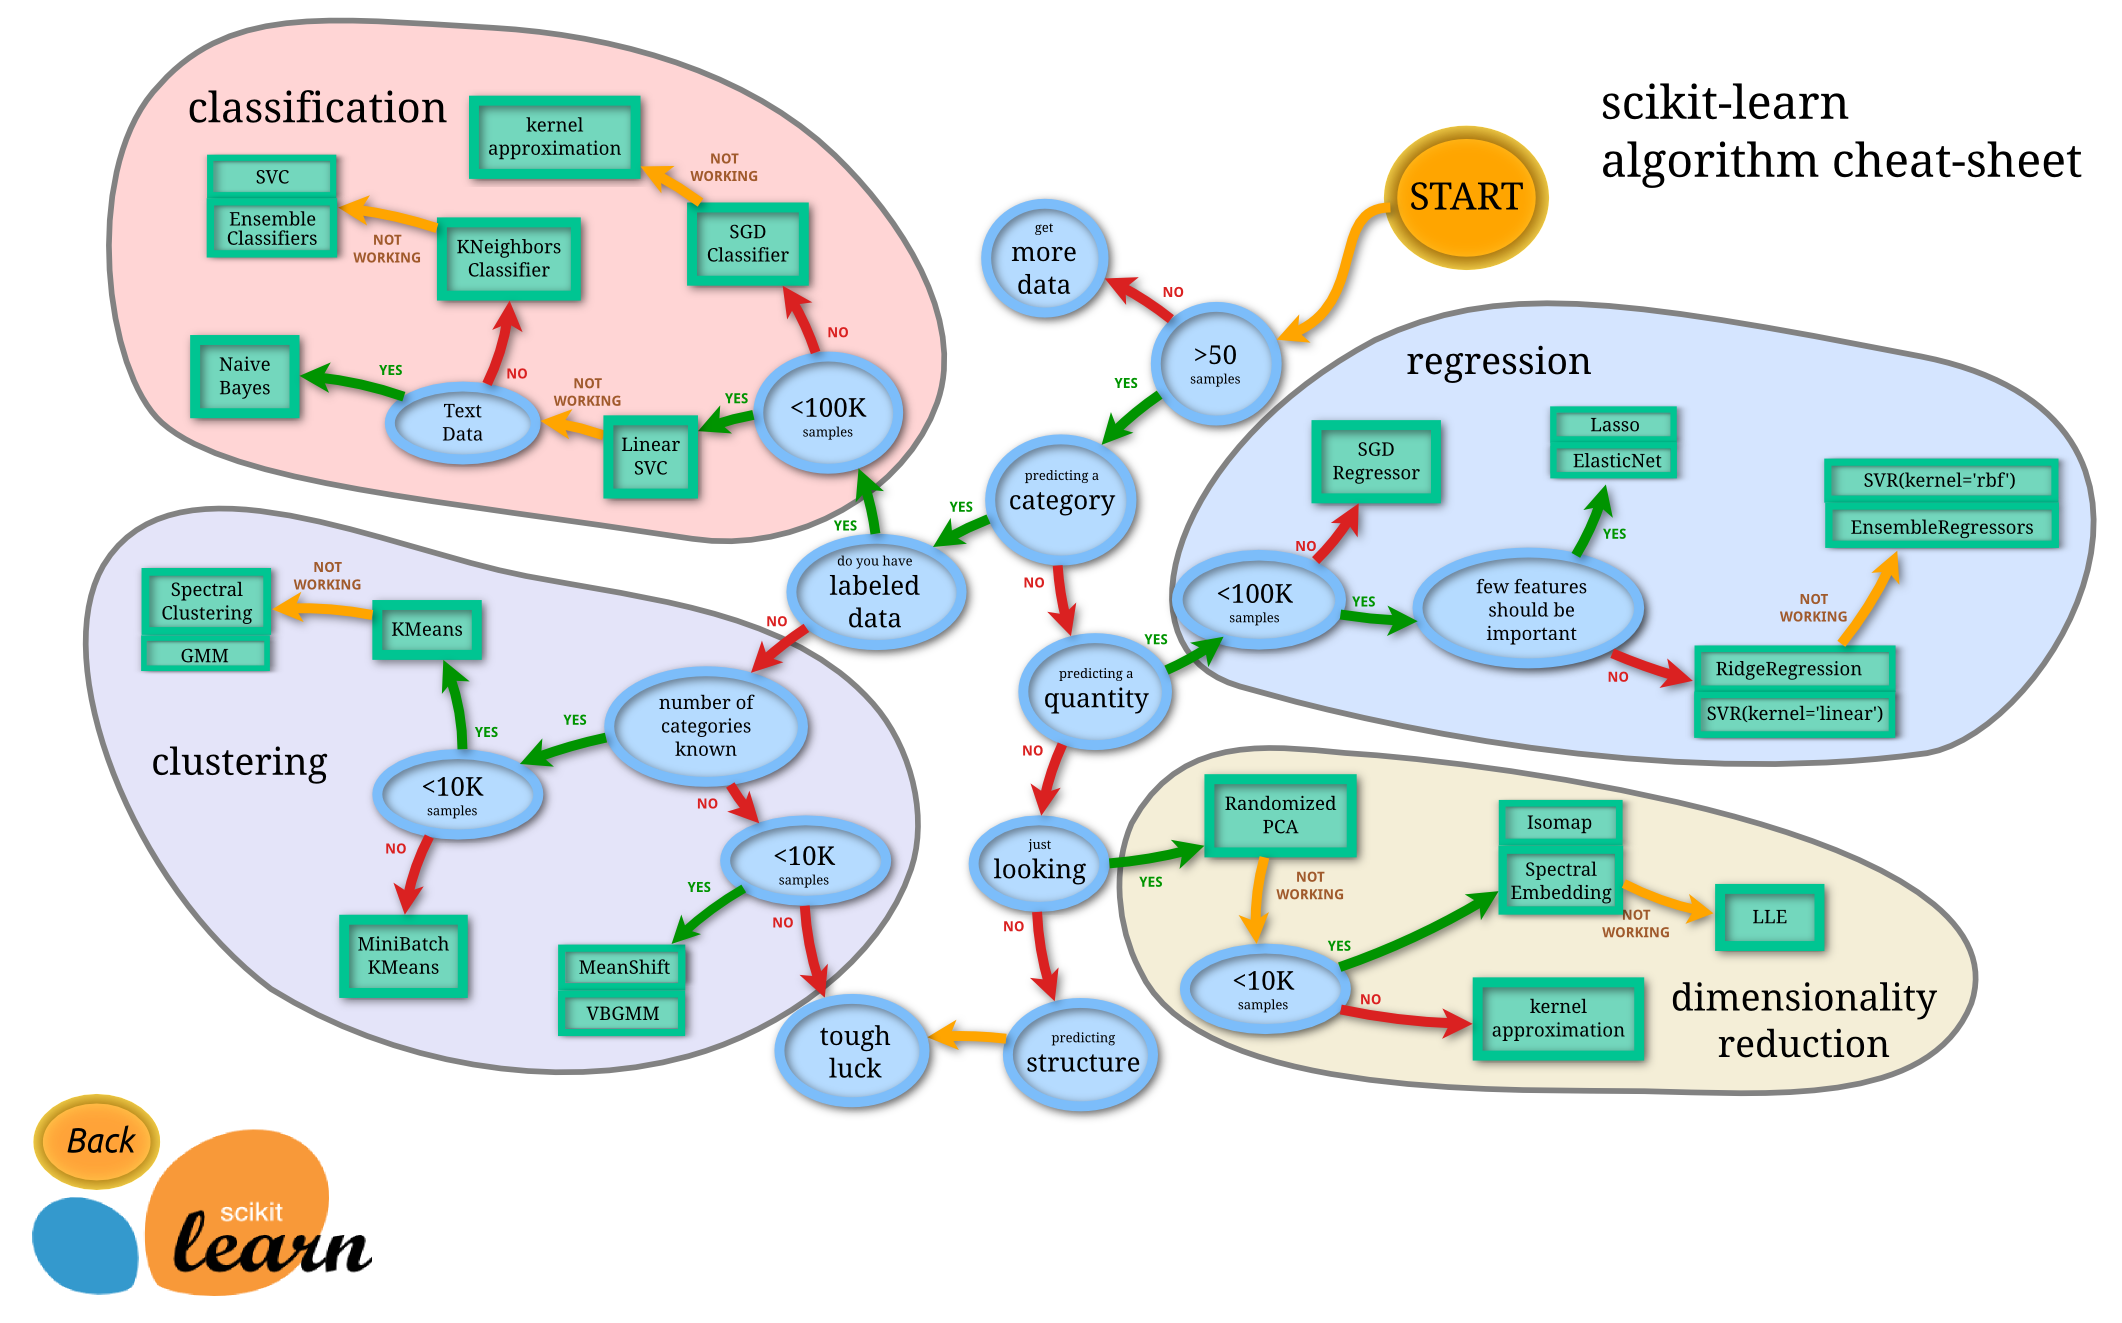

### 2.1 Picking Right ML Model for REGRESSION Problem

In [50]:
# Import Boston Housing Dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

***

It's a dictionary, we gotta convert this dictionary into Pandas DataFrame.

***

In [51]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

Consulted the map & it says `Ridge`

In [52]:
# Seeing the ML Map, we realize we gotta apply Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup Random Seed
np.random.seed(42)

# Split x & y
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(x_train, y_train)

# Check score of Ridge Model on test data
model.score(x_test, y_test)

0.6662221670168519

How do we improve this score?

What if Ridge isn't working?

**Ensemble Method**

In [53]:
# Let's try Rnadom Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split x & y
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Regressor Model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Check score of Ridge Model on test data
rf.score(x_test, y_test)

0.8654448653350507

### 2.2 Picking Right ML Model for CLASSIFICATION Problem

In [54]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

Consulted the map & it says `LinearSVC`

In [55]:
# Import LinearSVC Estimator Class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split x & y
x = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Instantiate the Linear SVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\nandn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

**Ensemble Method**

In [56]:
# Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split x & y
x = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Classifier Model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Check score of Random Forest Classifier on test data
clf.score(x_test, y_test)

0.8524590163934426

***

TIDBIT -

    1. Structured Data => Ensemble Methods
    2. UnStructured Data => Deep Learning or Transfer Learning
    
***

In [57]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 3. FIT THE MODEL TO THE DATA & MAKE PREDICTIONS

### 3.1 Fitting the model to the data

In [58]:
# Let's try Rnadom Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split x & y
x = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Classifier Model
clf = RandomForestClassifier()

# Fit the model to the data (training the ML model)
clf.fit(x_train, y_train)

# Check score of Random Forest Classifier on test data (Use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make Predictions using ML Model

2 ways to make predictions

1. `predict()`
2. `predict_proba()`

#### Make predictions with predict()

In [59]:
# Use a trained model to predict
clf.predict(x_test)

## This is what our model has predicted when it got the test data

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
np.array(y_test)

# This is what the actual truth is hence what the model would have predicted if it's accuracy was 100%

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

**3 HANDY METHODS**

In [61]:
# Compare predictions to Truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [62]:
clf.score(x_test, y_test)
# Returns mean accuracy of predict(x_test) or y_preds wrt y_test.

0.8524590163934426

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)
# Returns Accuracy classification score

0.8524590163934426

#### Make predictions with predict_proba()

`predict_proba()` returns probabilities of a classification label

In [64]:
clf.predict_proba(x_test[:5])
# First column gives probability of label being 0
# second column gives probability of label being 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [65]:
# Let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

So what exactly happening here is that `predict_proba()` is telling that if you give me the training data & I'm asked to predict data on test set then I'm predicting label 0 with a probability of 0.89 & 1 with probability of 0.11

**`predict()` can also be used for regression models**

In [66]:
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [67]:
# Let's try Rnadom Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split x & y
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Regressor Model
model = RandomForestRegressor().fit(x_train, y_train)

# Make Predictions
y_preds = model.predict(x_test)

In [68]:
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [69]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [70]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64

In [71]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [72]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

This means on an average our model predict +/- 2.1 away from the truth (target) or y_test label values

In [73]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 4. EVALUATING A MODEL

3 Different APIs to evaluate - 
1. Estimator `Score` Method
2. `Scoring` Parameter
3. Problem Specific Metric Functions

***
TRY FOR CLASSIFICATION
***

In [74]:
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [75]:
# Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split x & y
x = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Classifier Model
clf = RandomForestClassifier().fit(x_train, y_train)

### 4.1 Evaluating A Model through `Score` Method

In [76]:
clf.score(x_test, y_test)
# Returns mean accuracy of predict(x_test) or y_preds wrt y_test.

0.8524590163934426

***
TRY FOR REGRESSION
***

In [77]:
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [78]:
# Let's try Rnadom Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split x & y
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Regressor Model
model = RandomForestRegressor().fit(x_train, y_train)

In [79]:
model.score(x_test, y_test)
# Return the coefficient of determination R^2 of the prediction

0.8654448653350507

### 4.2 Evaluating A Model through `Scoring` Parameter

In [80]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split x & y
x = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Random Forest Classifier Model
clf = RandomForestClassifier().fit(x_train, y_train)

In [81]:
clf.score(x_test, y_test)

0.8524590163934426

In [82]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

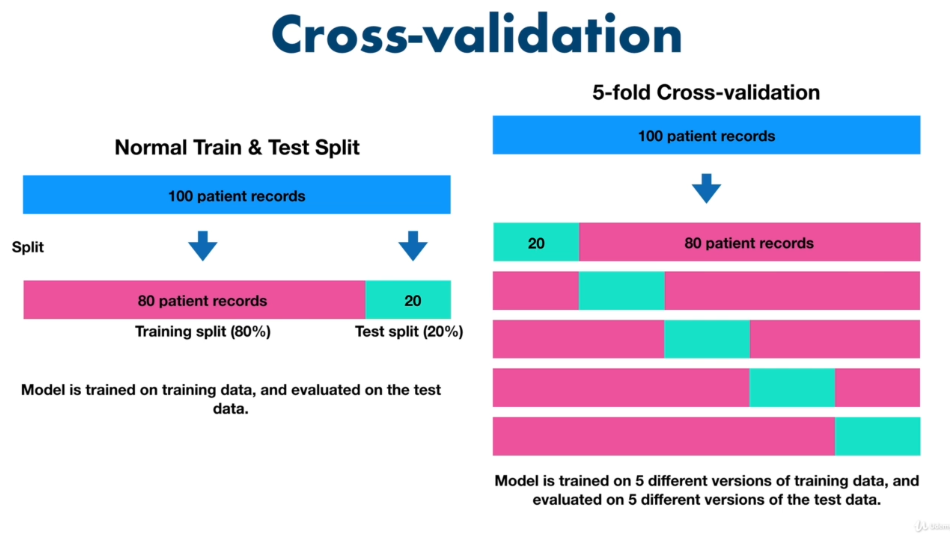

In [83]:
np.random.seed(42)

# Single training & test split score
clf_single_score = clf.score(x_test, y_test)

# Take mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

<!-- ### 4.2.1 Evaluating A Model through

* [Classification Model Evaluation Metrics](#Classification-Model-Evaluation-Metrics)
* [Regression Model Evaluation Metrics](#Regression-Model-Evaluation-Metrics) -->

### 4.2.1 Classification Model Evaluation Metrics

1. [Accuracy](#1.-ACCURACY-METHOD)
2. [Area under ROC Curve](#2.-Area-Under-Receiver-Operating-Characterstics-Curve-(AUC/ROC))
3. [Confusion Matrix](#3.-CONFUSION-MATRIX)
4. [Classification Report](#4.-CLASSIFICATION-REPORT)

#### 1. ACCURACY METHOD

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)

In [85]:
np.mean(cross_val_score)

0.8248087431693989

In [86]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


This means given a sample to our traning model, **how likely is it to predict the right target.**

82% means 8 times out of 10, our model will predict tight label based on original training data

#### 2. Area Under Receiver Operating Characterstics Curve (AUC/ROC)

* Area Under Curve (AUC)
* ROC Curve

ROC Curve are a measure of a model's true positive rate (TPR) versus a model's false positive rate (FPR).

* TPR = Model Predicts 1 when Truth is 1
* FPR = Model Predicts 1 when Truth is 0
* TNR = Model Predicts 0 when Truth is 0
* FNR = Model Predicts 0 when Truth is 1

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [88]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.53, 0.47],
       [0.15, 0.85],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.15, 0.85],
       [0.84, 0.16],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.24, 0.76],
       [0.11, 0.89],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.96, 0.04],
       [0.08,

In [89]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [90]:
# Calculate FPR, TPR & Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

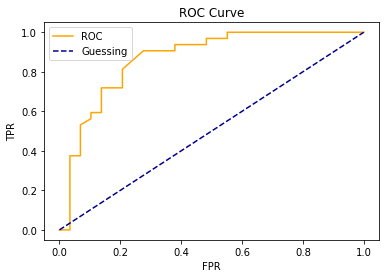

In [92]:
# Create function for plotting ROC Curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    """
    Plots ROC Curve given the FPR & TPR
    """
    
    #Plot ROC Curve
    plt.plot(fpr, tpr, color = "orange",label = "ROC")
    
    #Plot line with no prective power
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

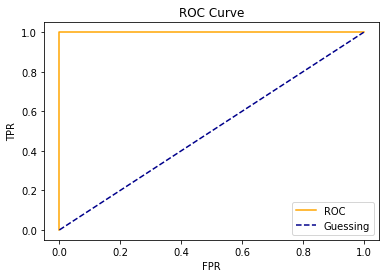

In [94]:
# Plot perfect ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [95]:
# Perfect ROC Score

roc_auc_score(y_test, y_test)

1.0

#### 3. CONFUSION MATRIX

A confusion matrix is a quick way to compare the labels a model predicts & the actual label it was supposed to predict.

In, essence, giving us the idea where the model got confused.

In [98]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [100]:
# Visualize Confusion Matrix with pd.crosstab()

pd.crosstab(y_test, y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels   0   1
Actual Labels           
0                 23   6
1                  6  26

Model predicted label to be 1 but the actual was 0 (6 cases like this), hence FPR = 6 (1st row, 2nd column).

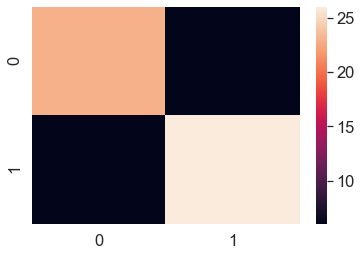

In [101]:
# Make confusion matric more visual with seaborn
import seaborn as sns

# Set font scale
sns.set(font_scale = 1.5)

# Create Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot using heatmap
sns.heatmap(conf_mat)

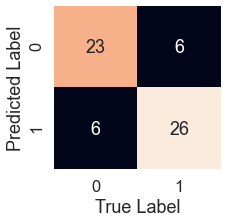

In [102]:
def plot_conf_mat(conf_mat):
    
    """
    Plots confusion matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(conf_mat,
                     annot = True,
                     cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

#### 4. CLASSIFICATION REPORT

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



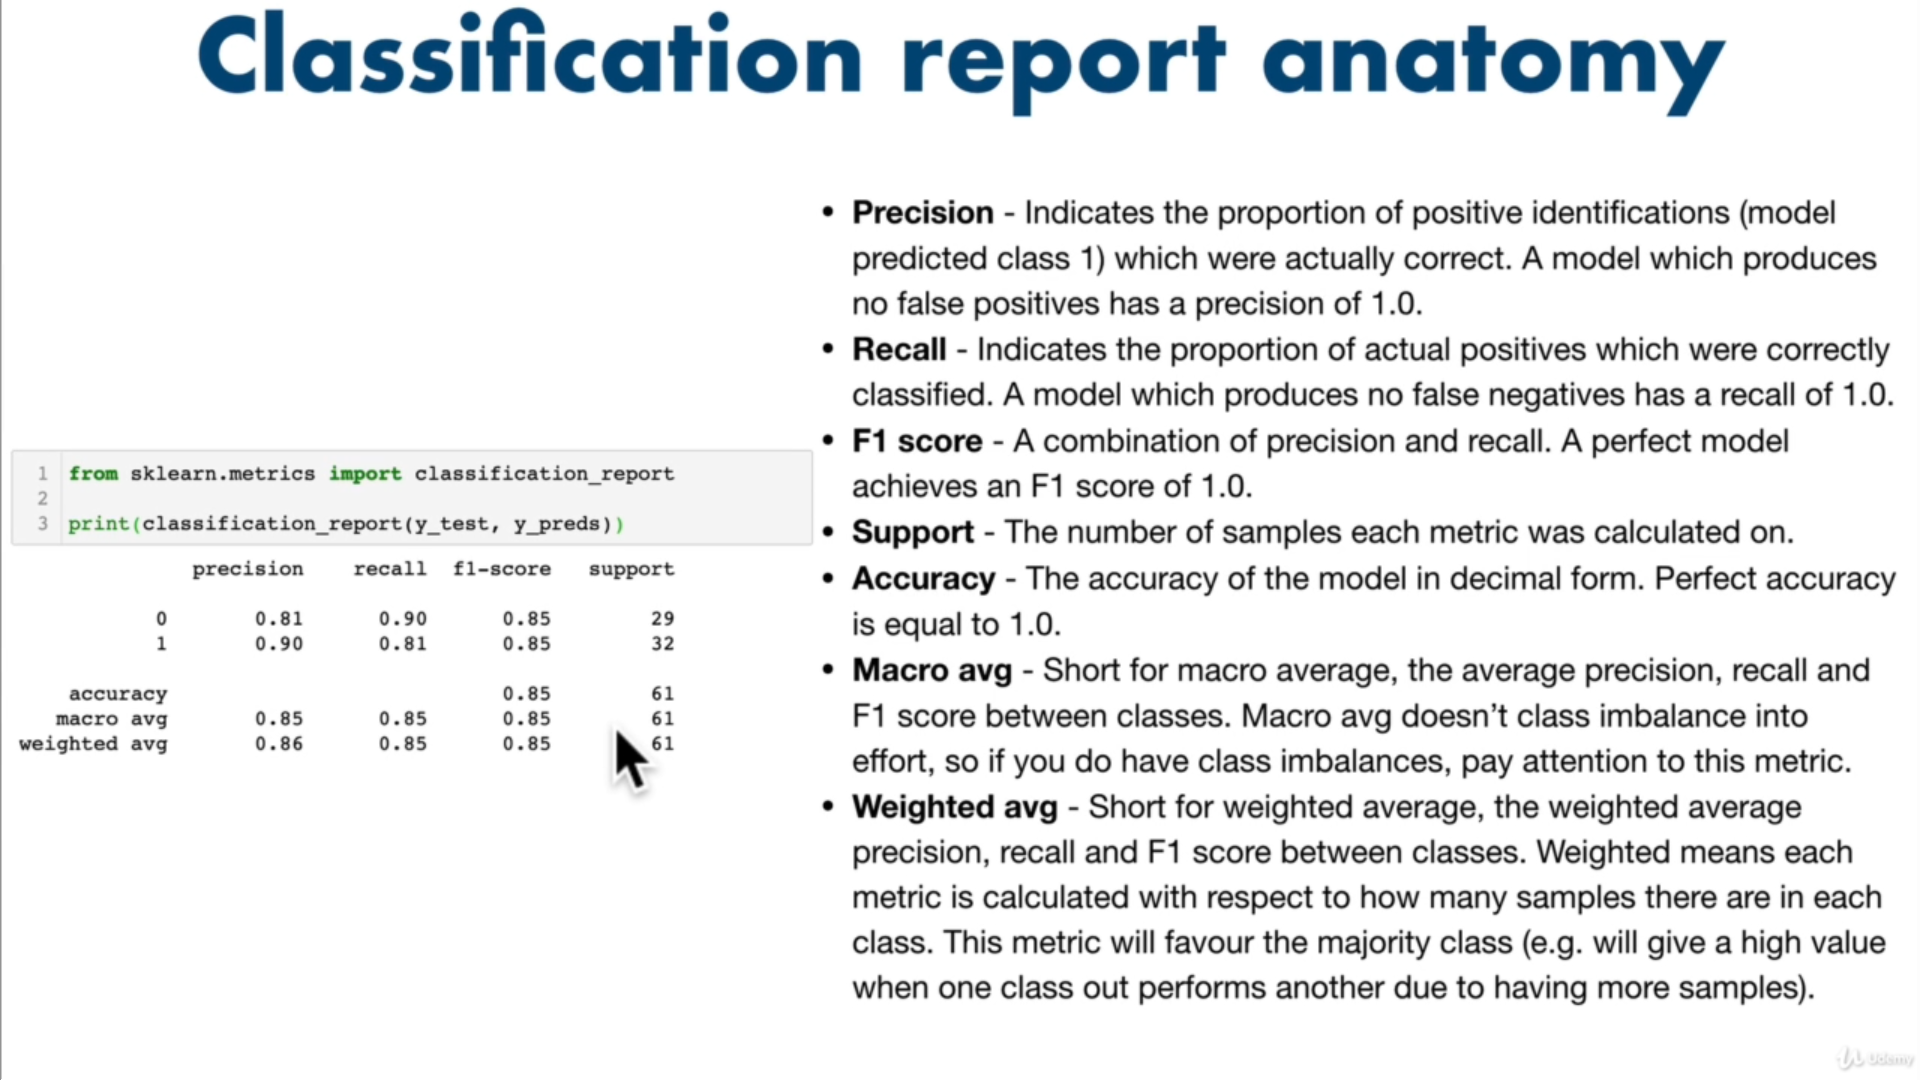

### 4.2.2 Regression Model Evaluation Metrics

1. [R^2 (R sqaured) or coeffecient of determination](#1.-R^2)
2. [Mean Absolute Error (MAE)](#2.-MEAN-ABSOLUTE-ERROR)
3. [Mean Squared Error (MSE)](#3.-MEAN-SQUARED-ERROR)

#### 1. R^2

Compares your models predictions to the mean of the targets. Values can range from negative inf (veryyy poor model) to 1 (Good one). For example, if all your model does, is predict mean of targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [105]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [106]:
model.score(x_test, y_test)

0.8654448653350507

In [111]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test.mean()

21.488235294117654

In [112]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [115]:
r2_score(y_test, y_test_mean)

# It should come exactly as 0.0 but IDK why it's showing this value 😢

2.220446049250313e-16

In [114]:
r2_score(y_test, y_test)

1.0

#### 2. MEAN ABSOLUTE ERROR

MAE is the average of the absolute differences between predctions & actual value. It gives you how **wrong** our model is.

In [117]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [122]:
df = pd.DataFrame(data = {"Actual Values":y_test,
                          "Predicted Values":y_preds})

df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df

Actual Values  Predicted Values  Differences
173           23.6            23.081       -0.519
274           32.4            30.574       -1.826
491           13.6            16.759        3.159
72            22.8            23.460        0.660
452           16.1            16.893        0.793
..             ...               ...          ...
412           17.9            13.159       -4.741
436            9.6            12.476        2.876
411           17.2            13.612       -3.588
86            22.5            20.205       -2.295
75            21.4            23.832        2.432

[102 rows x 3 columns]

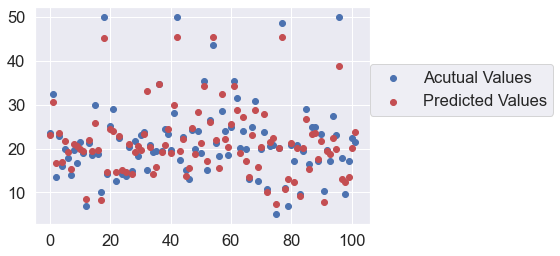

In [126]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["Actual Values"], c='b', label="Acutual Values")
ax.scatter(x, df["Predicted Values"], c='r', label="Predicted Values")
ax.legend(loc=(1, 0.5));

#### 3. MEAN SQUARED ERROR

In [123]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [124]:
# Calculate MSE by formula

squared = np.square(df["Differences"])
squared.mean()

9.867437068627439

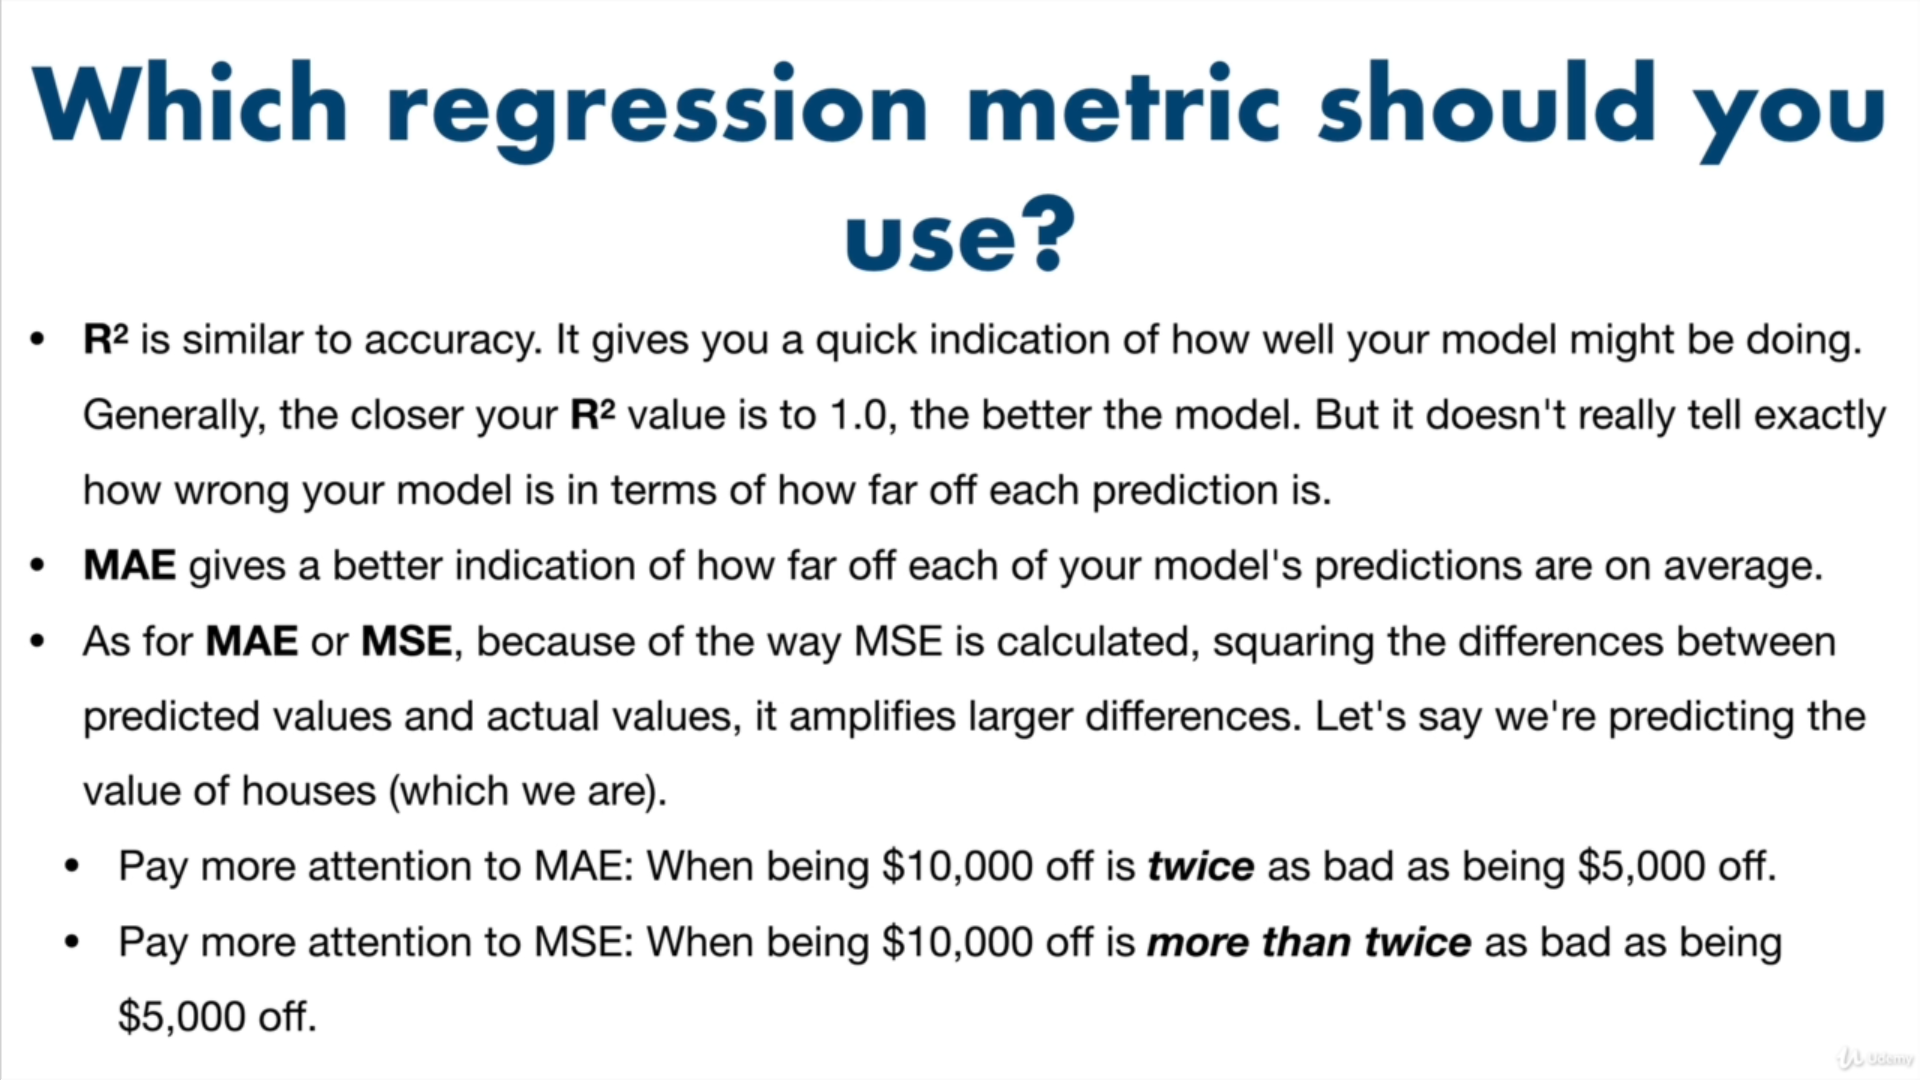

### 4.2.3 Finally using the `scoring` parameter

As a refresh, the scoring parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [131]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [133]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


***
OTHER METRICS OF CLASSIFICATION
***

In [135]:
# PRECISION

np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [136]:
# RECALL

np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [137]:
# F1 SCORE

np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


***
OTHER METRICS OF REGRESSION
***

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [139]:
# Default metric in regresson is r^2

np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.62


In [141]:
# MEAN ABSOLUTE ERROR

np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")
cv_mae

The cross-validated MAE score is: -3.03


array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

Why the **`"neg_"?`**

Because Scikit-Learn documentation states:

<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values" target="_blank">"All scorer objects follow the convention that higher return values are better than lower return values."</a>

Which in this case, means a lower negative value (closer to 0) is better.

In [143]:
# MEAN SQUARED ERROR

np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")
cv_mse

The cross-validated MSE score is: -21.26


array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### Using Problem Specific Metric Functions

Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.



**CLASSIFICATION FUNCTIONS**

For:

* Accuracy we can use `accuracy_score()`
* Precision we can use `precision_score()`
* Recall we can use `recall_score()`
* F1 we can use `f1_score()`

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Make predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


**REGRESSION FUNCTIONS**

For:

* R^2 we can use `r2_score()`
* MAE (mean absolute error) we can use `mean_absolute_error()`
* MSE (mean squared error) we can use `mean_squared_error()`

In [146]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.87
MAE: 2.14
MSE: 9.87


In [147]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 5. Improve Accuracy of Model

* Baseline Predictions - First predictions
* Baseline Model - First Model

From a data perspective asks:

* **Could we collect more data?** In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* **Could we improve our data?** This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:

* **Is there a better model we could use?** If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
* **Could we improve the current model?** If the model you're using performs well straight out of the box, can the *hyperparameters* be tuned to make it even better?

Hyperparameters VS Parameters

* **Parameters** - Model finds these patterns in data (Patterns) 
* **Hyperparameter** - Settings on a model you can adjust to (potentially) improve its ability to find patterns

In [148]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We can get default parameter thru get_params()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

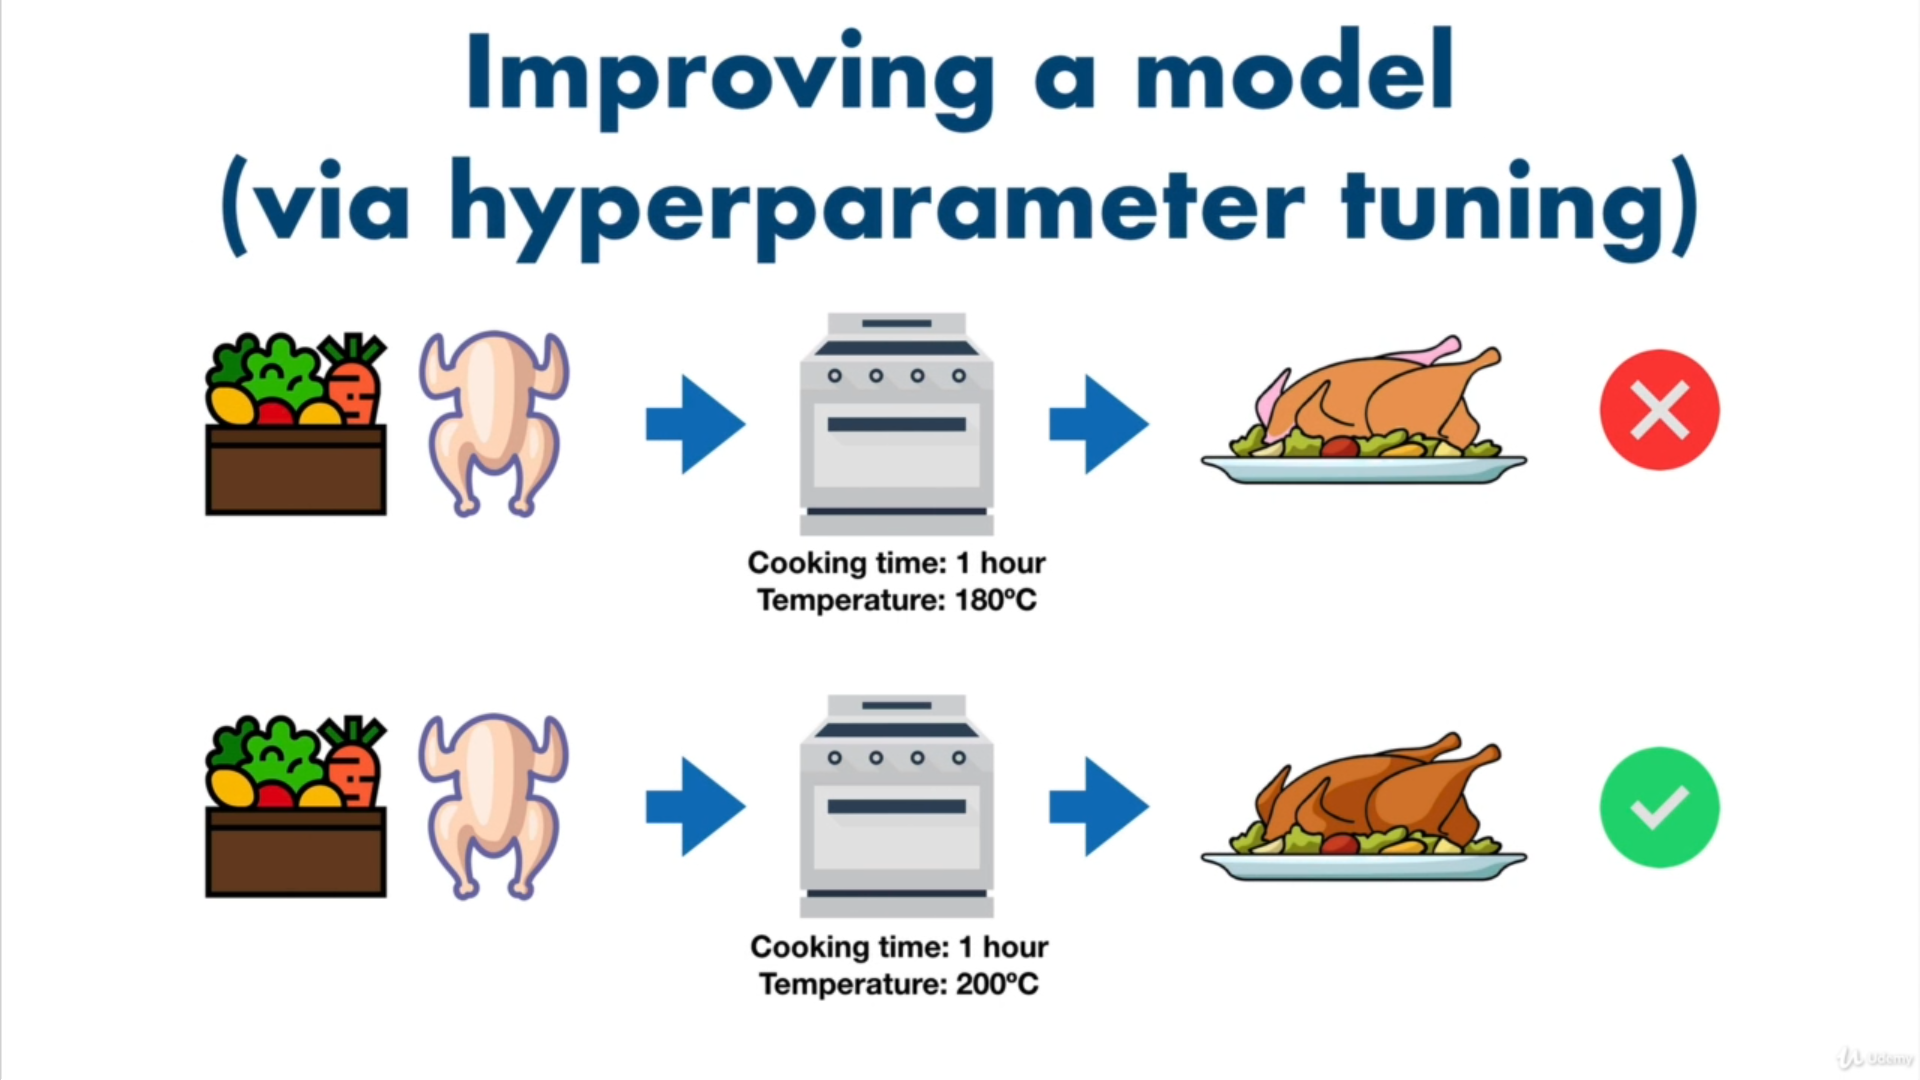

You can think of hyperparameters as being similar to dials on an oven. On the default setting your oven might do an okay job cooking your favourite meal (model finding **patterns** on its own). But with a little experimentation, you find it does better when you adjust the settings (adjusting the **hyperparameters**).

Can adjust hyperparameters in 3 ways:

1. [By hand](#5.1-Tuning-Hyperparameters-by-hand)
2. [Randomly with RandomSearchCV](#5.2-Tuning-Hyperparameters-by-RandomizedSearchCV)
3. [Exhaustively with GridSearchCV](#5.3-Hyperparameter-tuning-with-GridSearchCV)

### 5.1 Tuning Hyperparameters by hand

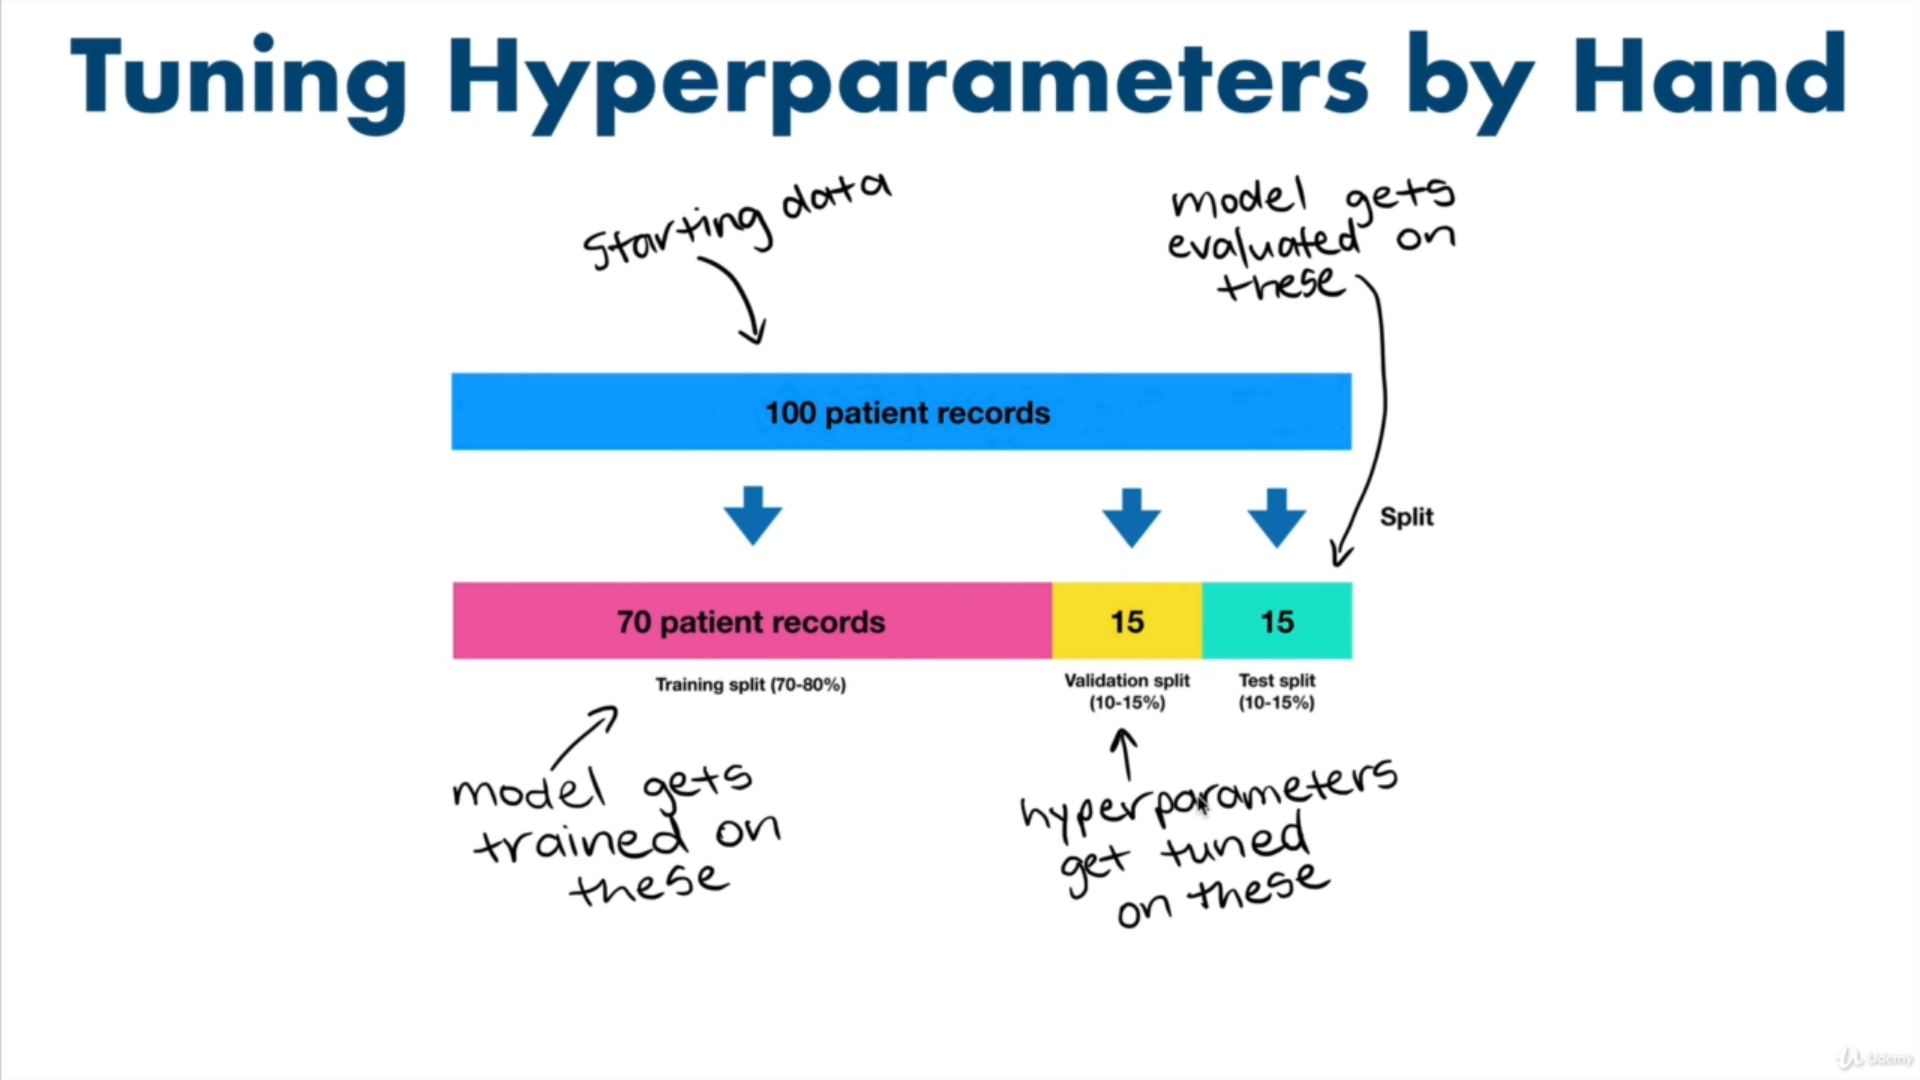

In [149]:
# First, let's remind ourselves of the base parameters.

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [154]:
# Creating this function because we're gonna call this in each case when we are tuning out hyperparameters.

def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [155]:
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data (so that don't come in order)
heart_disease_shuffled = heart_disease.sample(frac = 1)

#Split into x & y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into training,validation & test set
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data

valid_split = round(train_split + 0.15 *  len(heart_disease_shuffled)) #15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [159]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [160]:
# Hypertuning max_depth

np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(x_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


Ohh bad lmao, hence we can't really do it by hand because we gotta do a lot of hit & trail, so we'll try the other 2 methods

### 5.2 Tuning Hyperparameters by RandomizedSearchCV

Scikit-Learn's `RandomizedSearchCV` allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

In [161]:
# First, we create a grid (dictionary) of hyperparameters we'd like to search over.
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Now we've got the grid setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, 
# And instantiate a model with those values and test each model.
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Set n_jobs to -1 to use all cores 
clf = RandomForestClassifier(n_jobs = -1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models only (instead of all 540 combinations)
                            cv=5, # 5-fold cross-validation #results we get will be cross-validated YAYY!
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train); 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [162]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [163]:
# Make predictions with best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### 5.3 Hyperparameter tuning with GridSearchCV

The main difference between `GridSearchCV` and `RandomizedSearchCV` is **GridSearchCV searches across a grid of hyperparamters exhaustively**, where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

In [164]:
grid_2 = {"n_estimators": [10, 100, 200],
        "max_depth": [5, 10, 20],
        "max_features": ["auto"],
        "min_samples_split": [6],
        "min_samples_leaf": [2, 4]} 

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Set n_jobs to -1 to use all cores
clf = RandomForestClassifier(n_jobs= -1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4,

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   25.1s finished


In [165]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [166]:
# Make predictions with best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

# Evaluate Predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


Oh no, it's all experimentational, so just try & move on.

### Let's compare our different model metrics

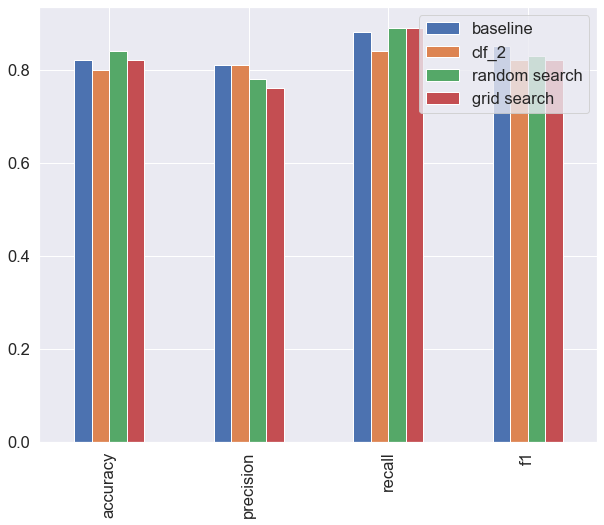

In [167]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [168]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 6. Save & Load a Trained Model

2 ways to save & load a ML model -
1. With Python's `Pickle` module
2. With the `joblib` module

### 6.1 Pickle Module

In [173]:
import pickle 

# Save an existing model to file
# We'll save our RnadomizedSearch model because it gave the best results
pickle.dump(rs_clf, open("RandomizedSearch Model (Scikit Learn).pkl", "wb"))

In [174]:
# Load a saved model
loaded_pickle_model = pickle.load(open("RandomizedSearch Model (Scikit Learn).pkl", "rb"))

In [175]:
# # First, we create a grid (dictionary) of hyperparameters we'd like to search over.
# grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
#         "max_depth": [None, 5, 10, 20, 30],
#         "max_features": ["auto", "sqrt"],
#         "min_samples_split": [2, 4, 6],
#         "min_samples_leaf": [1, 2, 4]}

# Now we've got the grid setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, 
# And instantiate a model with those values and test each model.
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

### 6.2 Joblib Module

In [176]:
from joblib import dump, load

# Save a model to file
dump(rs_clf, filename="RandomizedSearch Model (Scikit Learn).joblib")

['RandomizedSearch Model (Scikit Learn).joblib']

In [177]:
# Import a saved joblib model
loaded_joblib_model = load(filename="RandomizedSearch Model (Scikit Learn).joblib")

In [178]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

***
PICKLE VS JOBLIB
***

According to Scikit-Learn's documentation, they suggest it may be more efficient to use joblib as it's more efficient with large numpy array (which is what may be contained in trained/fitted Scikit-Learn models).

Read here further: https://scikit-learn.org/stable/modules/model_persistence.html

In [179]:
Contents

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting Data Ready',
 '2. Choosing Right estimator/algo for our problem',
 '3. Fit the model/algo & use it to make predictions',
 '4. Evaluating A Model',
 '5. Improve Accuracy of model',
 '6. Save & Load a trained model',
 '7. Putting it all together']

## 7. Putting it all together

To tidy things up, we'll be using Scikit-Learn's Pipeline class. You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

In [180]:
data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [181]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [182]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do in one cell:

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [183]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = 
                                  [
                                      ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                  ])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = 
                            [
                                ("imputer", SimpleImputer(strategy="constant", fill_value=4))
                            ])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = 
                               [
                                   ("imputer", SimpleImputer(strategy="mean"))
                               ])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = 
                                 [
                                     ("cat", categorical_transformer, categorical_features),
                                     ("door", door_transformer, door_feature),
                                     ("num", numeric_transformer, numeric_features)
                                 ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor),
                          ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to `GridSearchCV` or `RandomizedSearchCV` with a Pipeline.

The main difference is when creating a hyperparameter grid, **you have to add a prefix to each hyperparameter.**

The prefix is the name of the Pipeline step you'd like to alter, followed by **two underscores.**

For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators".

In [184]:
# Using grid search with pipeline

from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.7s
[CV] model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.4s
[CV] model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.8s
[CV] model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_fea

[CV]  model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samp

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min

[CV]  model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=sqrt, model

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [185]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [186]:
gs_model.score(x_test, y_test)

0.292308819012865

As you can see here the accuracy increased, so YIPPEEEE!🥰

# WITH THIS, WE FINALLY END SCIKIT LEARN LIBRARY 🥺